In [1]:
import json, os
i = 86
directory = os.getcwd()
monpremierex = json.load(open(f"{directory}/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"{directory}/output/tcl{i}/tcl{i}.json", "r"))

In [2]:
print(monpremierex)

{'name': 'tcl86', 'input_path': 'tcl/input/tcl86', 'output_path': 'tcl/output/tcl86', 'working_dir': 'tcl/input/tcl86', 'initial_temperature': 18.792285989076603, 'coefDeltaTemp': 0.05625, 'coefConso': 1.0, 'puissanceMin': 0, 'puissanceMax': 4, 'temperature_max': 21.427520708998202, 'temperature_min': 16.13520071506932, 'chroniqueTempExt': [-1.9945069278440093, -0.9634072448379978, 0.10057438174736895, -2.398649067144043, -1.0201067412341802, -1.2188134813605036, 0.45425362212670667, 0.27470800319791694, 0.1364608414981528, 1.5928265419727043, -1.7654244159680477, -1.0733710745361829, 1.7533550121617405, 0.23436269779347596, -1.5372787017810086, 1.880403202633904, 2.2616715298921637, 3.554511109124909, 3.488816126390116, 1.6381430915395896, 3.7762855838174154, 4.072637004200081, 5.4878759306342495, 2.1182171808848023, 6.401947451088248, 3.033086776192051, 3.7532608600741444, 6.587895809285821, 6.614068093393714, 5.140188289339125, 5.58465802401839, 4.630893616852972, 5.256490104166818,

In [3]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
temp_min_liste =  [temperature_min for k in range(T)]
temp_max_liste =  [temperature_max for k in range(T)]
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

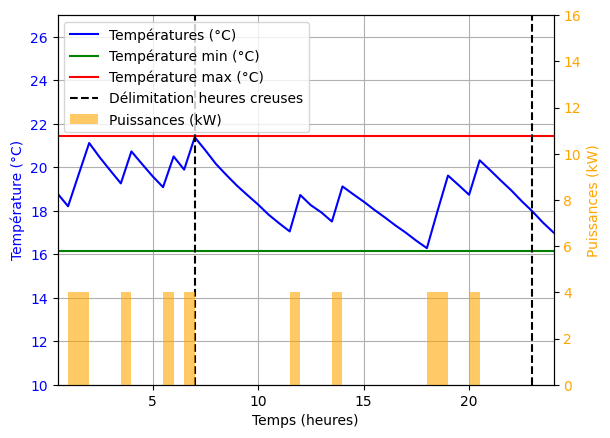

In [6]:
import matplotlib.pyplot as plt

# Données (exemple)
temps = [k / 2 for k in range(1,49)]

# Créer la figure et l'axe principal
fig, ax1 = plt.subplots()

# Tracer les températures sur l'axe principal (gauche)
ax1.plot(temps, temp_profile, label="Températures (°C)", color="blue", marker="")
ax1.plot(temps, temp_min_liste, label="Température min (°C)", color="green", marker="")
ax1.plot(temps, temp_max_liste, label="Température max (°C)", color="red", marker="")
ax1.set_xlabel("Temps (heures)")
ax1.set_ylabel("Température (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(10, 27)  # Limites de l'axe des températures
ax1.grid(True)

# Ajouter les lignes verticales pour délimiter heures pleines et creuses
ax1.axvline(x=7, color="black", linestyle="--", label="Délimitation heures creuses")
ax1.axvline(x=23, color="black", linestyle="--")

# Créer un second axe pour les puissances
ax2 = ax1.twinx()

# Tracer les puissances sous forme de diagramme (rectangles)
bar_width = -0.5  # Largeur des rectangles
ax2.bar(temps, load, width=bar_width, label="Puissances (kW)", color="orange", alpha=0.6, align="edge")
ax2.set_ylabel("Puissances (kW)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")
ax2.set_ylim(0, 16)  # Limites de l'axe des puissances

# Combiner les légendes des deux axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
bars_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + bars_2, labels_1 + labels_2, loc="upper left")
ax1.set_xlim(0.5, 24)

plt.show()


In [7]:
facture_totale=0
for i in range(4):
    tcl_i = json.load(open(f"{directory}/output/tcl{i+1}/tcl{i+1}.json", "r"))
    facture_totale+=tcl_i["cost"]
print(facture_totale)

13.046170821276625
